Dataset Shape: (2640, 21)
Analyzing 14 numeric variables and 1 categorical variables


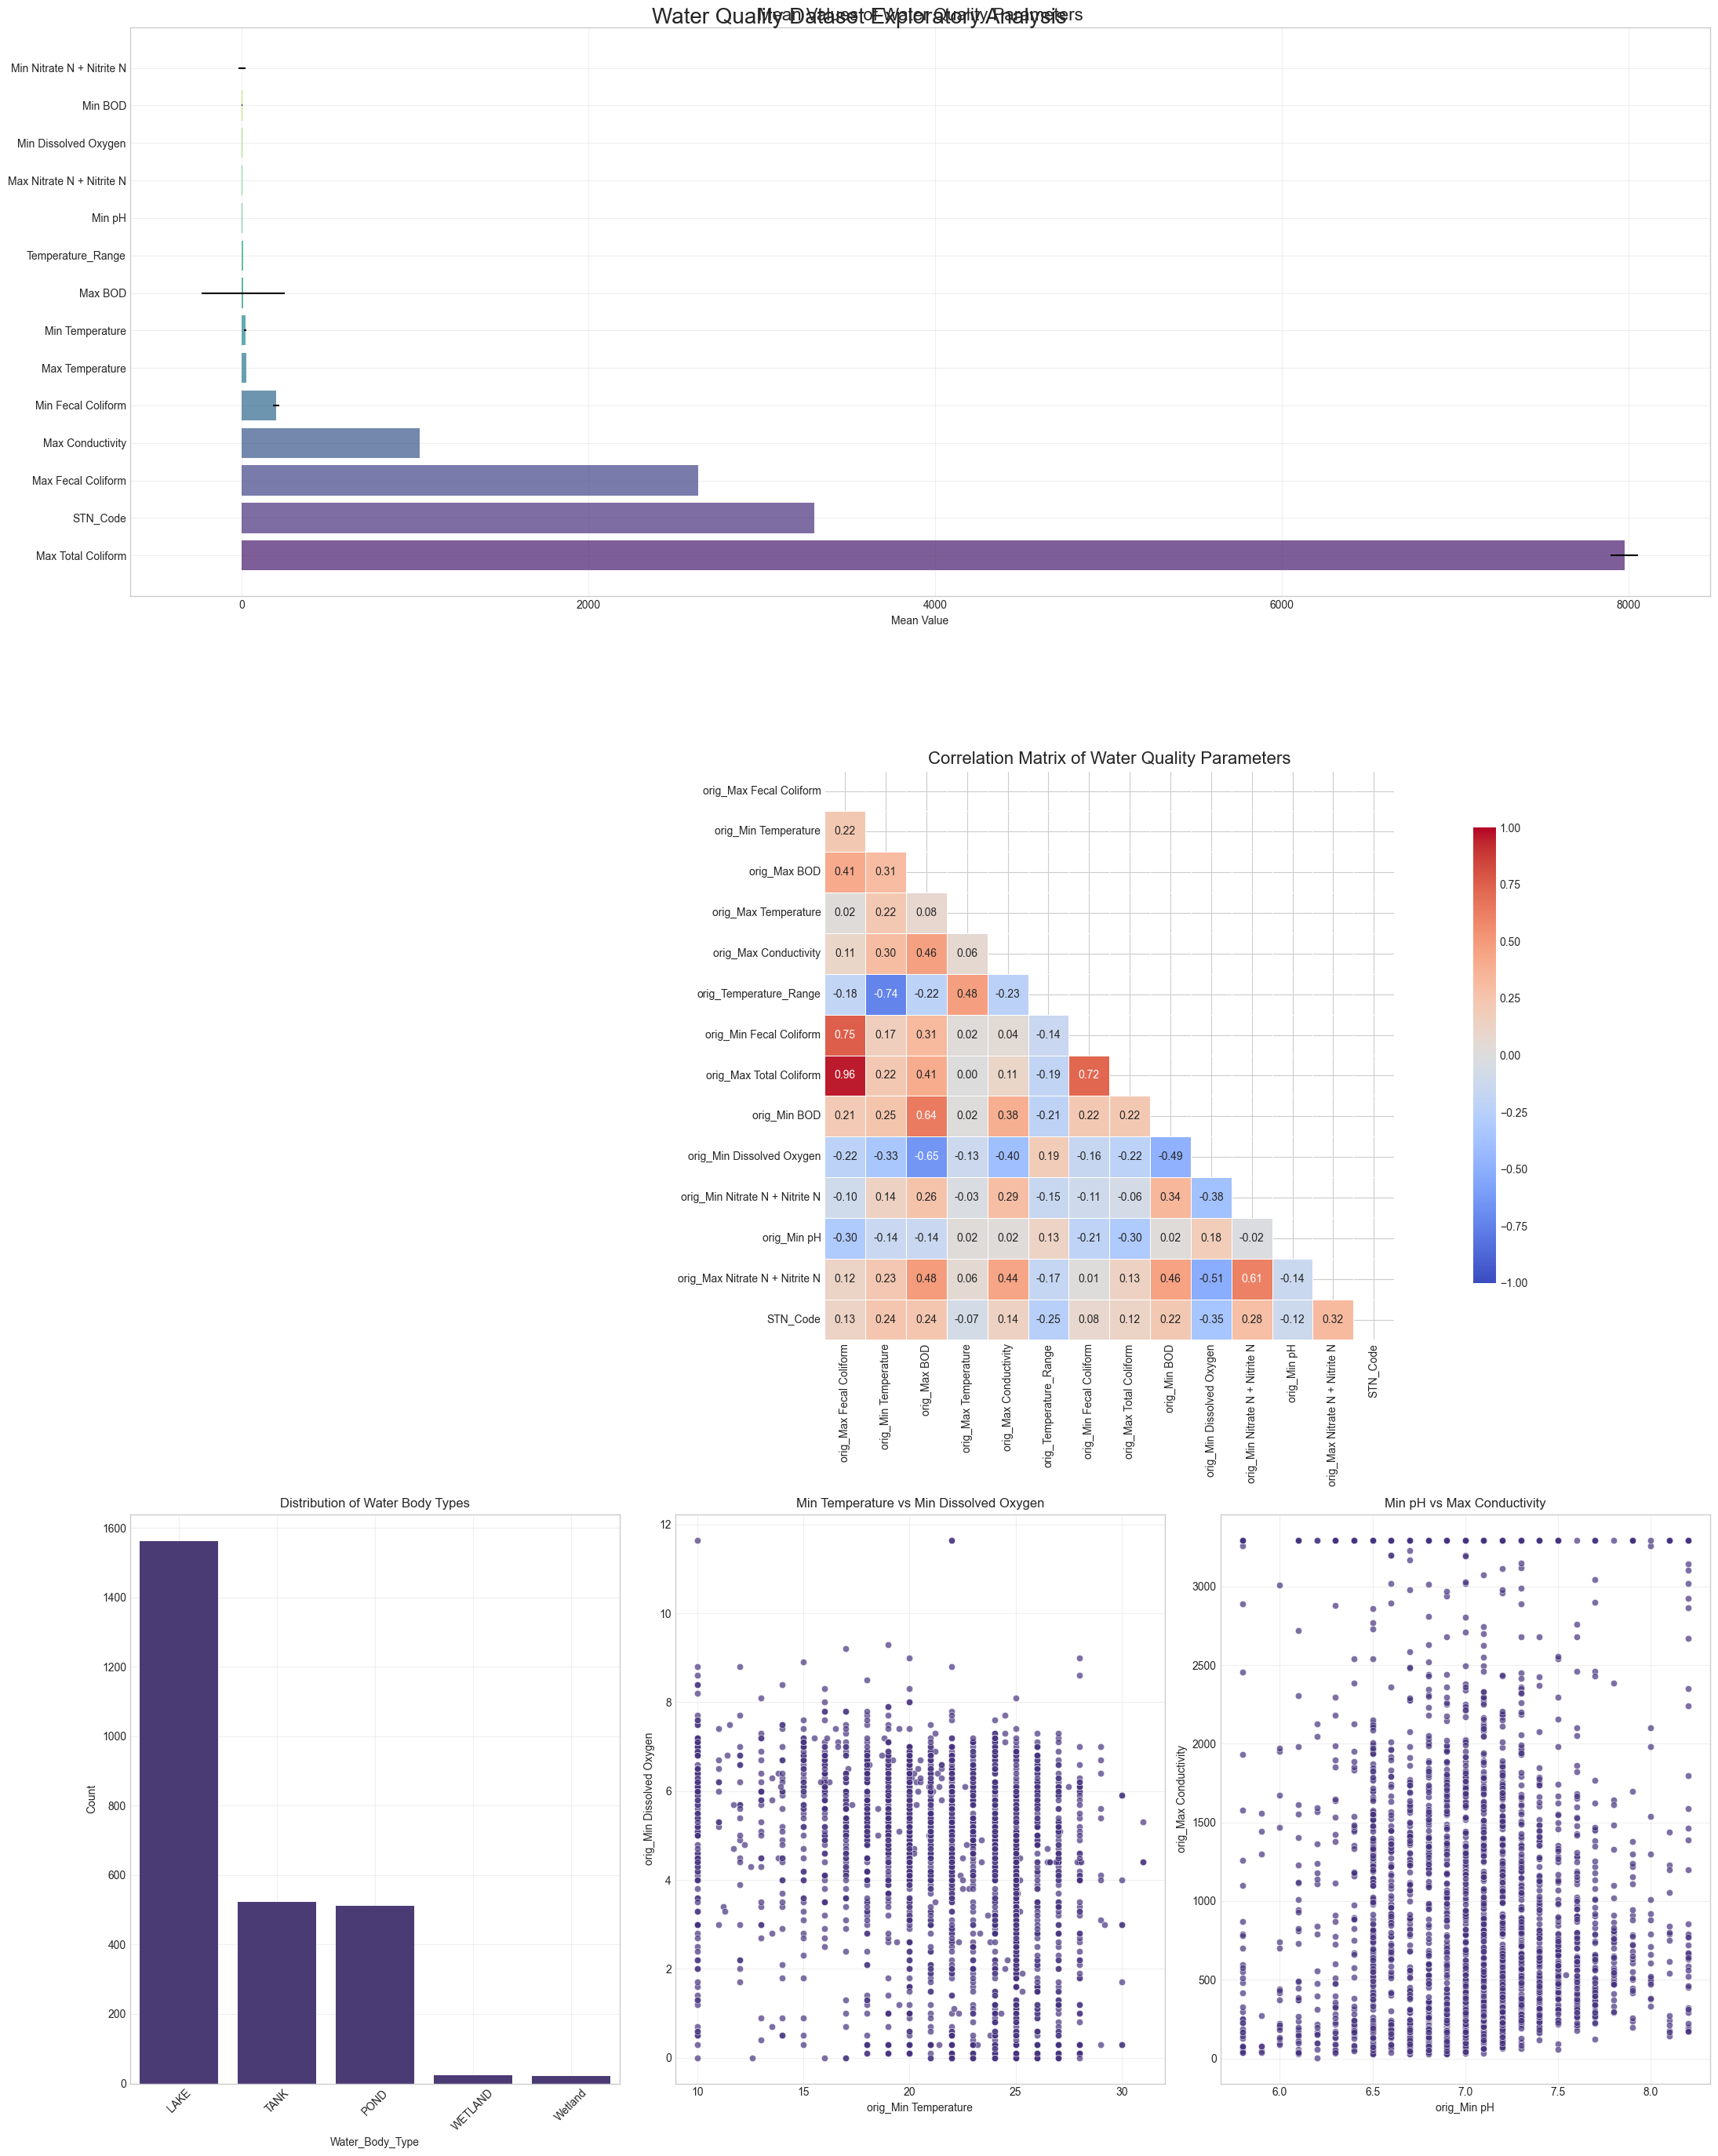


Summary Statistics of Water Quality Parameters:
       orig_Max Fecal Coliform  orig_Min Temperature  orig_Max BOD  \
count                  2640.00               2640.00       2640.00   
mean                   2633.77                 21.40         10.38   
std                    4131.40                  4.57         10.77   
min                       1.00                 10.00          0.10   
25%                      47.00                 19.00          2.80   
50%                     356.00                 22.00          5.00   
75%                    2700.00                 25.00         15.00   
max                   10678.00                 31.00         35.80   

       orig_Max Temperature  orig_Max Conductivity  orig_Temperature_Range  \
count               2640.00                2640.00                 2640.00   
mean                  29.00                1026.15                    7.72   
std                    3.71                 882.88                    5.46   
min     

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

df = pd.read_csv('final.csv')
print(f"Dataset Shape: {df.shape}")

all_non_pca = [col for col in df.columns if not col.startswith('PC')]
numeric_cols = df[all_non_pca].select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df[all_non_pca].select_dtypes(exclude=[np.number]).columns.tolist()

print(f"Analyzing {len(numeric_cols)} numeric variables and {len(categorical_cols)} categorical variables")

plt.figure(figsize=(22, 28))

plt.subplot(3, 1, 1)
plt.subplots_adjust(hspace=0.5)

means = df[numeric_cols].mean().sort_values(ascending=False)
errors = df[numeric_cols].std() / np.sqrt(len(df))

plt.barh(range(len(means)), means, xerr=errors, alpha=0.7,
         color=sns.color_palette('viridis', len(means)))
plt.yticks(range(len(means)), [col.replace('orig_', '') for col in means.index])
plt.title('Mean Values of Water Quality Parameters', fontsize=16)
plt.xlabel('Mean Value')
plt.grid(True, alpha=0.3)

plt.subplot(3, 1, 2)


corr = df[numeric_cols].corr()


mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw heatmap
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1.0, vmin=-1.0, 
           center=0, square=True, linewidths=.5, annot=True, fmt='.2f',
           cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Water Quality Parameters', fontsize=16)

plt.subplot(3, 3, 7)
if 'Water_Body_Type' in df.columns:
    body_counts = df['Water_Body_Type'].value_counts()
    sns.barplot(x=body_counts.index, y=body_counts.values)
    plt.title('Distribution of Water Body Types')
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.grid(True, alpha=0.3)
elif len(categorical_cols) > 0:
    cat_col = categorical_cols[0]
    counts = df[cat_col].value_counts()
    sns.barplot(x=counts.index, y=counts.values)
    plt.title(f'Distribution of {cat_col}')
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.grid(True, alpha=0.3)
else:
    key_cols = [col for col in numeric_cols if 'Fecal' in col or 'BOD' in col][:2]
    if len(key_cols) >= 2:
        sns.scatterplot(x=key_cols[0], y=key_cols[1], data=df, alpha=0.7)
        plt.title(f'{key_cols[0]} vs {key_cols[1]}')
        plt.grid(True, alpha=0.3)

plt.subplot(3, 3, 8)
temp_col = next((col for col in numeric_cols if 'Temperature' in col), None)
oxygen_col = next((col for col in numeric_cols if 'Oxygen' in col), None)

if temp_col and oxygen_col:
    sns.scatterplot(x=temp_col, y=oxygen_col, data=df, alpha=0.7)
    plt.title(f'{temp_col.replace("orig_", "")} vs {oxygen_col.replace("orig_", "")}')
    plt.grid(True, alpha=0.3)
else:

    if len(numeric_cols) >= 2:
        sns.scatterplot(x=numeric_cols[0], y=numeric_cols[1], data=df, alpha=0.7)
        plt.title(f'{numeric_cols[0].replace("orig_", "")} vs {numeric_cols[1].replace("orig_", "")}')
        plt.grid(True, alpha=0.3)

plt.subplot(3, 3, 9)
ph_col = next((col for col in numeric_cols if 'pH' in col), None)
conductivity_col = next((col for col in numeric_cols if 'Conductivity' in col), None)

if ph_col and conductivity_col:
    sns.scatterplot(x=ph_col, y=conductivity_col, data=df, alpha=0.7)
    plt.title(f'{ph_col.replace("orig_", "")} vs {conductivity_col.replace("orig_", "")}')
    plt.grid(True, alpha=0.3)
else:
    if len(numeric_cols) >= 3:
        sns.scatterplot(x=numeric_cols[1], y=numeric_cols[2], data=df, alpha=0.7)
        plt.title(f'{numeric_cols[1].replace("orig_", "")} vs {numeric_cols[2].replace("orig_", "")}')
        plt.grid(True, alpha=0.3)

plt.suptitle('Water Quality Dataset Exploratory Analysis', fontsize=20, y=0.98)

plt.tight_layout()
plt.show()

print("\nSummary Statistics of Water Quality Parameters:")
print(df[numeric_cols].describe().round(2))

if len(categorical_cols) > 0:
    print("\nDistribution of Categorical Variables:")
    for col in categorical_cols:
        print(f"\n{col}:")
        print(df[col].value_counts())